# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exploratory Data Analysis 

In [228]:
# Lectura datos, relación variables, mapas de correlación...

In [229]:
# Utiliza todas las celdas que necesites...

In [230]:
df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [232]:
df["newpaper"].value_counts()

newpaper
25.6    3
8.7     3
9.3     3
45.1    2
30.0    2
       ..
3.7     1
5.8     1
13.8    1
8.1     1
66.2    1
Name: count, Length: 172, dtype: int64

In [233]:
df.rename(columns={"newpaper":"newspaper"}, inplace=True)
df['newspaper'] = df['newspaper'].str.replace("s", "")
df['newspaper'] = df['newspaper'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [234]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


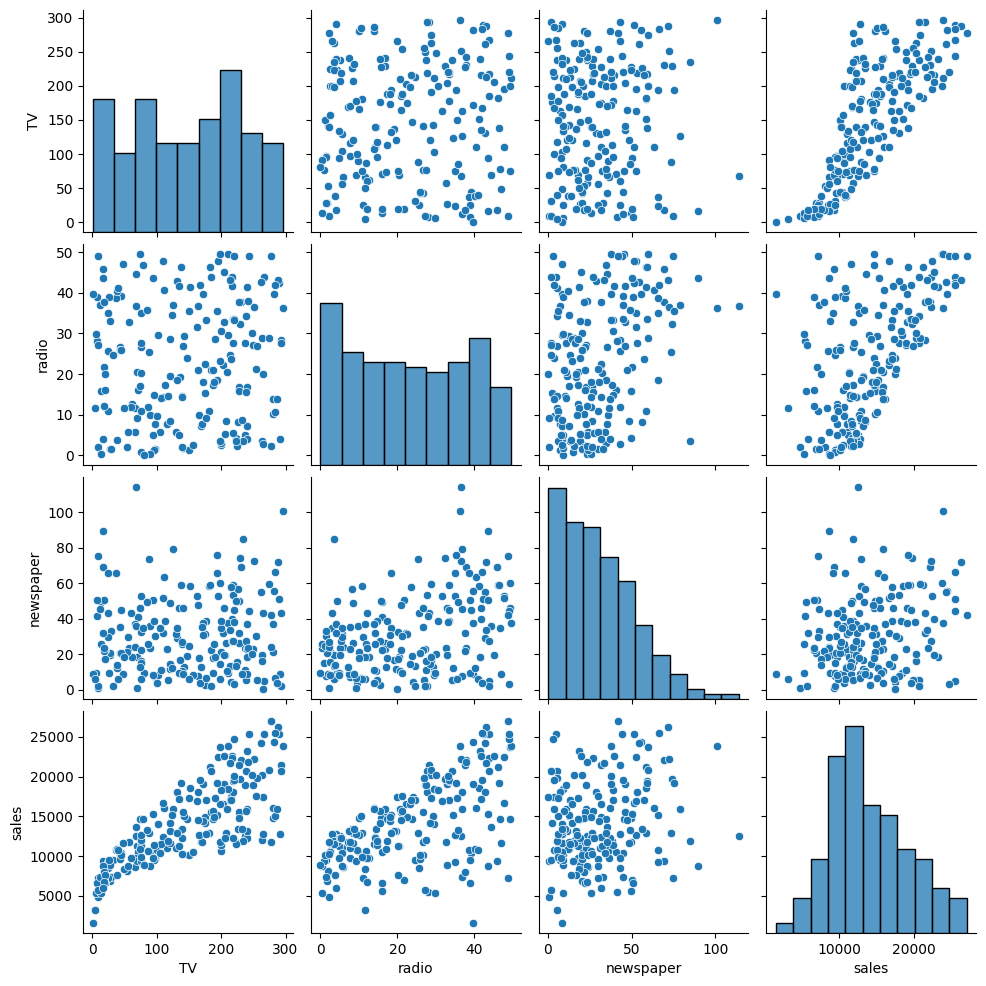

In [235]:
sns.pairplot(df)

<Axes: >

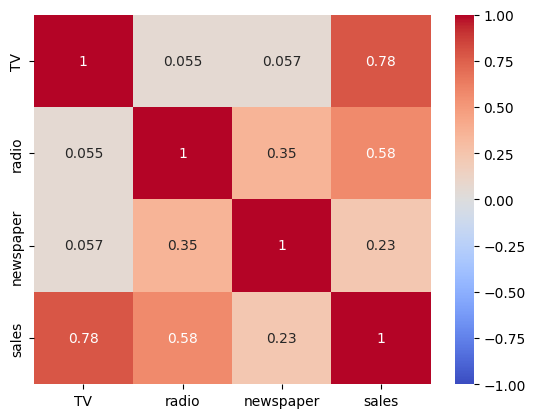

In [236]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1)

## Modelado

In [237]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [238]:
# Utiliza todas las celdas que necesites...

In [239]:
X = df[["TV", "radio", "newspaper"]]
y = df['sales']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [242]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R2 score test", r2_score(y_test, y_pred))
print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score test 0.899438024100912
MAE test 1460.7567168117605
MSE test 3174097.3539761053
RMSE test 1781.5996615334504


In [243]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("R2 score train", r2_score(y_train, y_pred_train))
    print("MAE train", mean_absolute_error(y_train, y_pred_train))
    print("MSE train", mean_squared_error(y_train, y_pred_train))
    print("RMSE train", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print()
    print("R2 score test", r2_score(y_test, y_pred))
    print("MAE test", mean_absolute_error(y_test, y_pred))
    print("MSE test", mean_squared_error(y_test, y_pred))
    print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))
    return model


In [244]:
model_1 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_1

R2 score train 0.8957008271017817
MAE train 1198.4678961500135
MSE train 2705129.423081414
RMSE train 1644.7277656443373

R2 score test 0.899438024100912
MAE test 1460.7567168117605
MSE test 3174097.3539761053
RMSE test 1781.5996615334504


LinearRegression()

In [245]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [246]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.019375,22.875625,29.945625
std,84.418857,14.805216,20.336449
min,0.700000,0.000000,0.300000
25%,77.750000,9.825000,12.875000
50%,150.650000,21.200000,25.600000
75%,218.825000,36.425000,44.500000
max,296.400000,49.600000,100.900000


In [247]:
pd.DataFrame(X_train_scal).describe()

,0,1,2
count,160.000000,160.000000,160.000000
mean,0.504969,0.461202,0.294688
std,0.285488,0.298492,0.202152
min,0.000000,0.000000,0.000000
25%,0.260568,0.198085,0.125000
50%,0.507102,0.427419,0.251491
75%,0.737656,0.734375,0.439364
max,1.000000,1.000000,1.000000


In [248]:
model_2 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_2

R2 score train 0.8957008271017817
MAE train 1198.4678961500133
MSE train 2705129.423081414
RMSE train 1644.7277656443373

R2 score test 0.899438024100912
MAE test 1460.7567168117603
MSE test 3174097.353976106
RMSE test 1781.5996615334507


LinearRegression()

In [249]:
model_3 = train_evaluate_model(Ridge(alpha=0.1), X_train_scal, y_train, X_test_scal, y_test)
model_3

R2 score train 0.8956542818544961
MAE train 1199.2163914277749
MSE train 2706336.632251323
RMSE train 1645.0947183221163

R2 score test 0.8986591607392291
MAE test 1464.7443890153074
MSE test 3198681.080711023
RMSE test 1788.48569485781


Ridge(alpha=0.1)

In [250]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
baseline_error = mean_squared_error(y_pred, y_test)

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scal)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

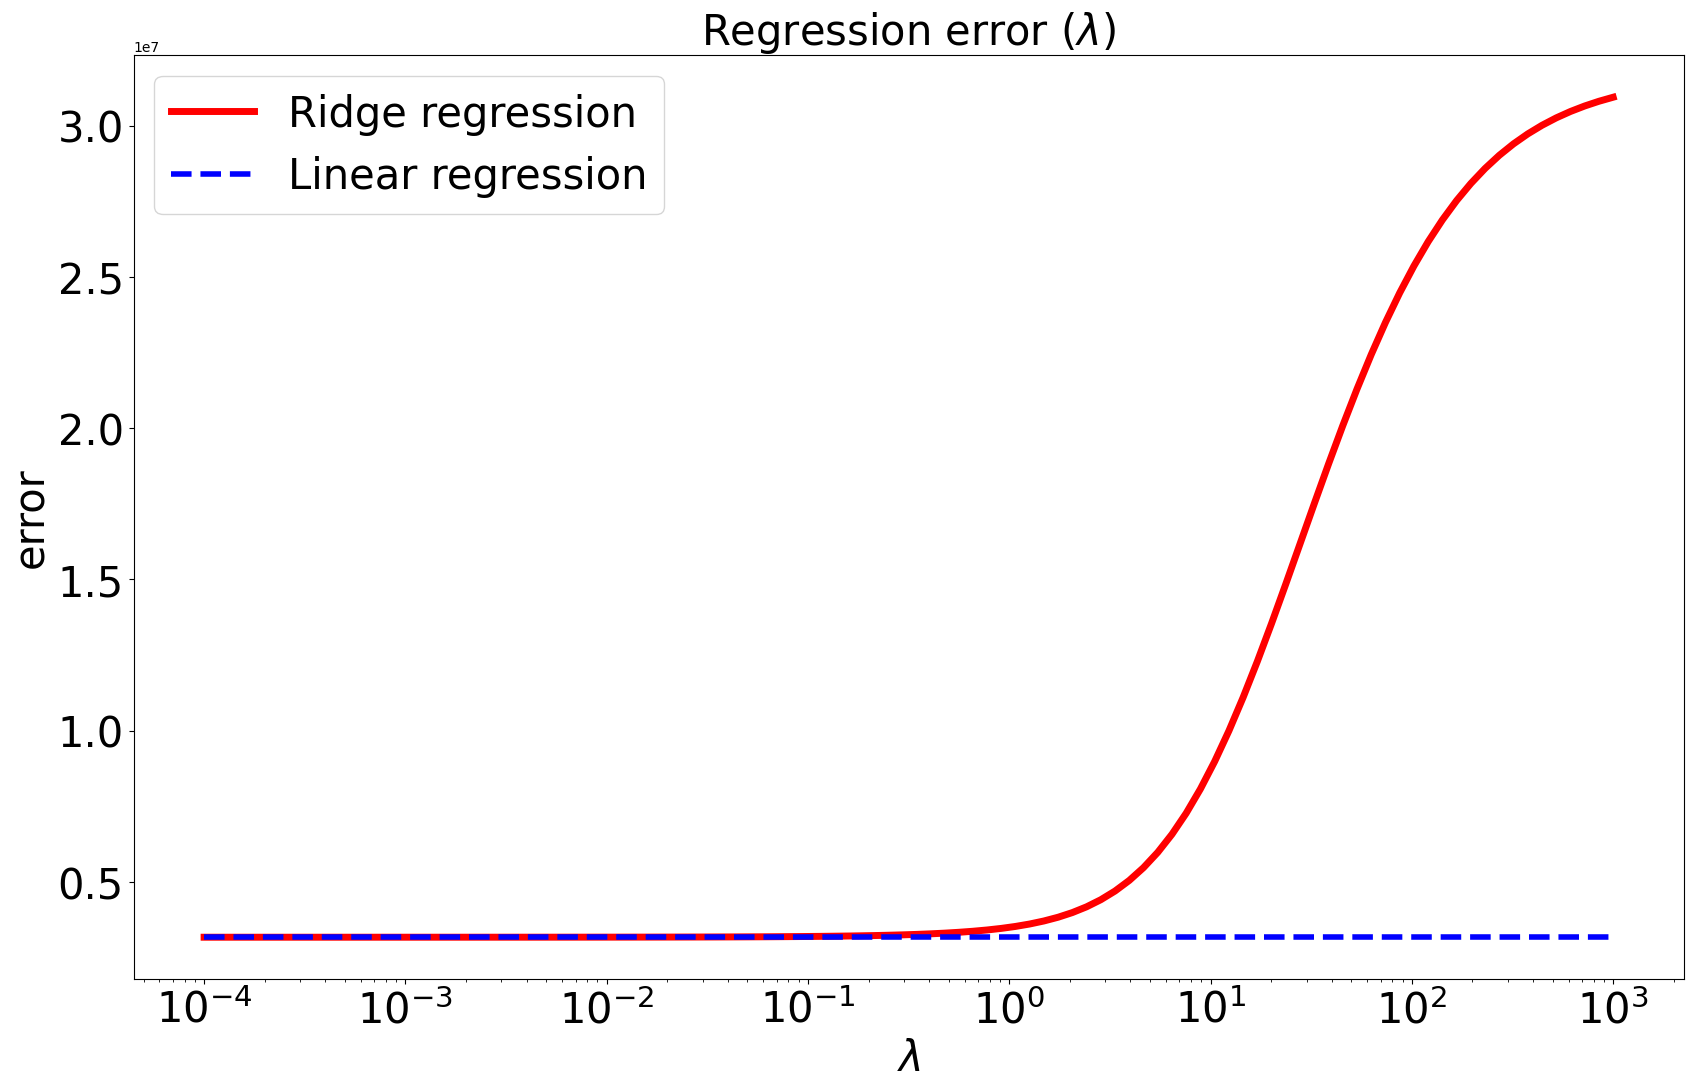

In [251]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [252]:
np.min(ridge_error)

np.float64(30939176.903210662)

In [253]:
np.argmin(ridge_error)

np.int64(0)

In [254]:
alphas[int(np.argmin(ridge_error))]

np.float64(0.0001)

# (Explicación contaminación entre train y test)

In [255]:
# ejemplo escalado

edades = [20, 35, 40, 25, 18]

train = [20, 35, 40, 25]

test = [18]


# # minmaxscaler todo X (incorrecto)
# 18 --> 0
# 40 --> 1

# # minmaxscaler solo X_train (correcto)
# 20 --> 0
# 40 --> 1

# # Futuros datos que desconozco
# 18 --> -0.1


In [256]:
# ejemplo escalado

#edades = [20, nan, 40, 25, 18, nan]

#train = [20, nan, 40, 25]

#test = [18, nan]


# # fill na value con mean todo X (incorrecto)
# media = (20 + 40 + 25 + 18)/4 = 25.75

# train = [20, 25.75, 40, 25]
# test = [18, 25.75]

# # fill na value con mean solo X_train (correcto)
# media = (20 + 40 + 25)/3 = 28.3
# train = [20, 28.3, 40, 25]
# test = [18, 28.3]

Problemas:
* Distorsión de escala: Los valores extremos en el conjunto de prueba pueden alterar las relaciones relativas entre las características transformadas. Esto puede afectar el desempeño de los modelos, especialmente si son sensibles a la escala o usan regularización (como Ridge o SVM).

* Posible deterioro del modelo: Los modelos que dependen de la escala uniforme pueden hacer predicciones incorrectas porque las características del conjunto de prueba no están dentro del mismo rango de las utilizadas para entrenar.

Soluciones posibles:

Si anticipas que el conjunto de prueba puede tener valores más extremos, podrías ajustar el MinMaxScaler en un rango ampliado que considere los posibles valores extremos. Por ejemplo, usar un conjunto de validación o conocimiento previo sobre los datos para estimar un rango razonable

### Modelos Polinómicos

In [257]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [258]:
model_4 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_4

R2 score train 0.986104518792419
MAE train 408.97219513550624
MSE train 360396.67447012226
RMSE train 600.3304710491733

R2 score test 0.9869181490609605
MAE test 526.1794444043729
MSE test 412910.228537899
RMSE test 642.5809120553605


LinearRegression()

In [259]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [260]:
model_5 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_5

R2 score train 0.9916695295589968
MAE train 317.7015419249498
MSE train 216061.16397546846
RMSE train 464.82379884798115

R2 score test 0.9906674629185213
MAE test 388.6817048651651
MSE test 294568.40909660456
RMSE test 542.741567503913


LinearRegression()

In [261]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [262]:
model_6 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_6

R2 score train 0.9914394563593426
MAE train 367.7
MSE train 222028.4
RMSE train 471.19889643334267

R2 score test 0.8320000554436232
MAE test 998.3
MSE test 5302682.0
RMSE test 2302.75530614957


LinearRegression()

In [ ]:
#model_7 = train_evaluate_model(Ridge(alpha=0), X_poly_train, y_train, X_poly_test, y_test)
#model_7

R2 score train 0.9916695295589968
MAE train 317.70154192494954
MSE train 216061.16397546855
RMSE train 464.82379884798127

R2 score test 0.9906674629185215
MAE test 388.6817048651613
MSE test 294568.4090965992
RMSE test 542.7415675039081


Ridge(alpha=0)

In [277]:
model_7 = train_evaluate_model(Lasso(alpha=0), X_poly_train, y_train, X_poly_test, y_test)
model_7

R2 score train 0.9912761945895471
MAE train 320.12708902815535
MSE train 226262.7980768609
RMSE train 475.6708926104906

R2 score test 0.9919667718287613
MAE test 343.797344331883
MSE test 253557.55049803518
RMSE test 503.54498358938616


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.810e+07, tolerance: 4.150e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

Lasso(alpha=0)

In [265]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
baseline_error = mean_squared_error(y_pred, y_test)

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_poly_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_poly_test)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

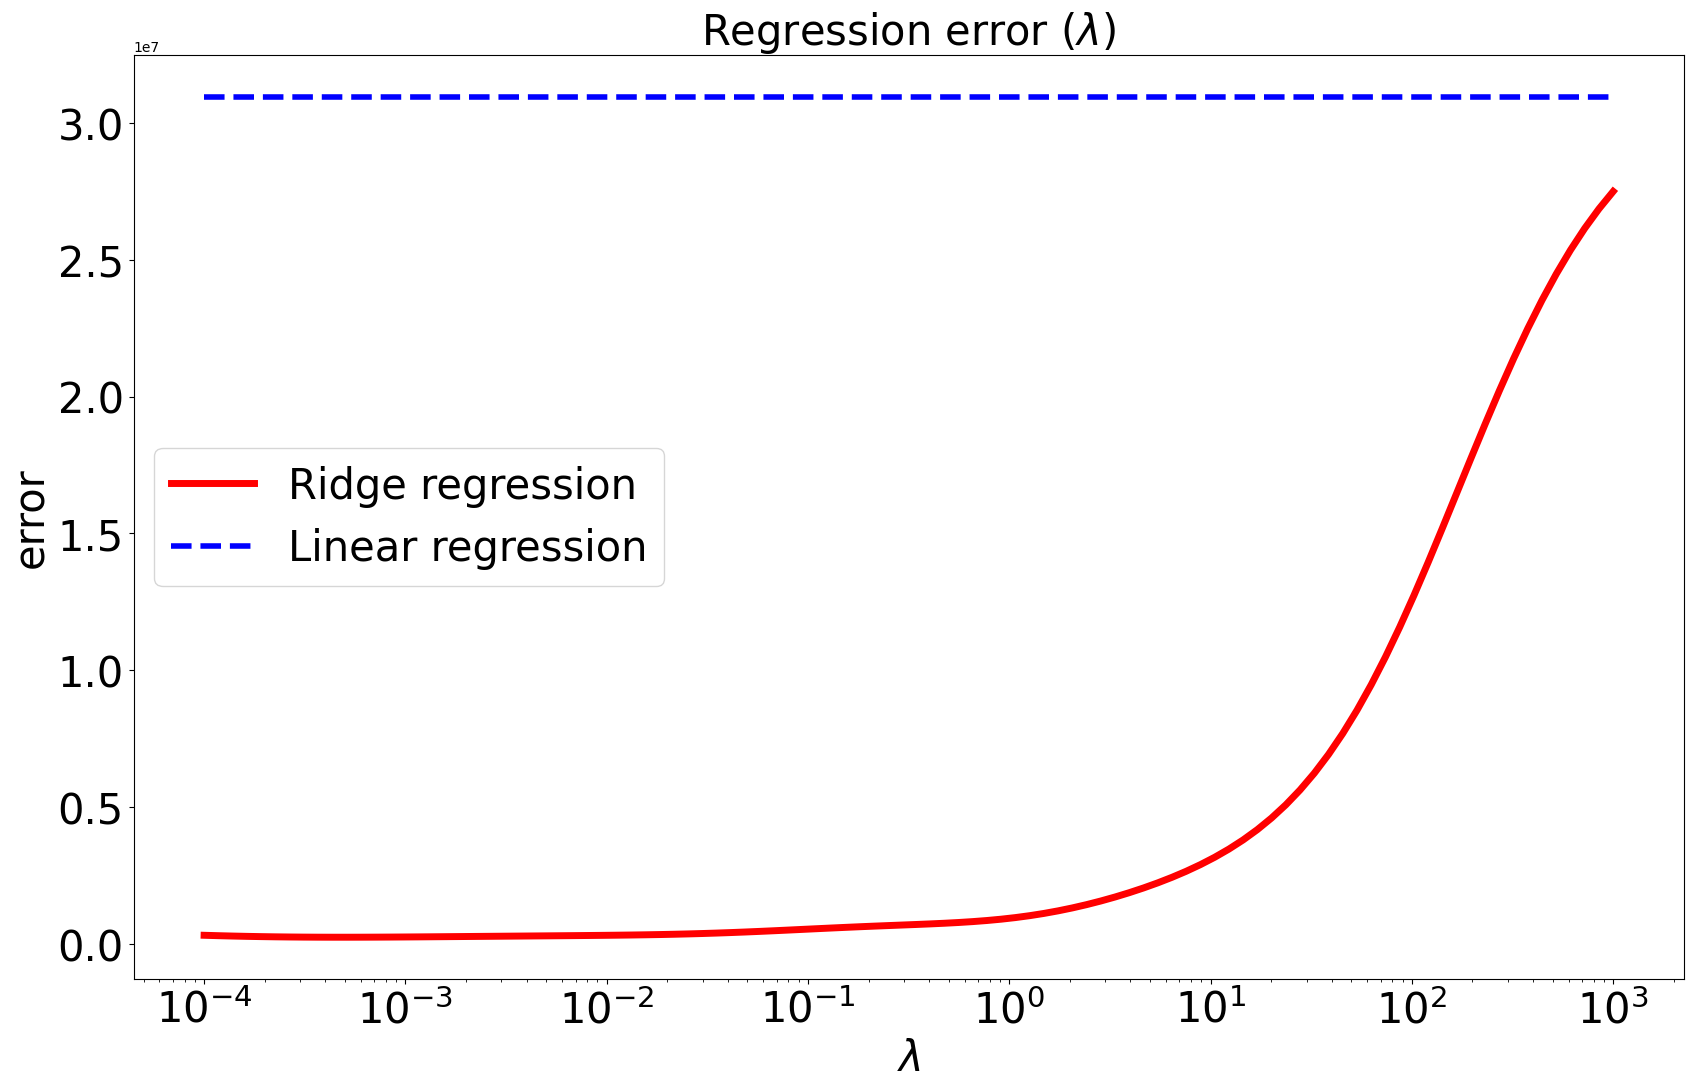

In [266]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [267]:
np.min(ridge_error)

np.float64(27495867.593038023)

In [268]:
np.argmin(ridge_error)

np.int64(0)

## Resultados

In [269]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [270]:
# Utiliza todas las celdas que necesites...

In [271]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

model_5 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_5

R2 score train 0.9916695295589968
MAE train 317.7015419249498
MSE train 216061.16397546846
RMSE train 464.82379884798115

R2 score test 0.9906674629185213
MAE test 388.6817048651651
MSE test 294568.40909660456
RMSE test 542.741567503913


LinearRegression()

In [272]:
X_test[:1]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [273]:
y_test[:1]

95    16900.0
Name: sales, dtype: float64

In [274]:
#tv = float(input("Inversión en TV"))
#radio = float(input("Inversión en radio"))
#newspaper = float(input("Inversión en newspaper"))


#model_5.predict(poly.transform(scaler.transform(pd.DataFrame([[tv, radio, newspaper]], columns=X_train.columns))))


In [275]:
#from sklearn.model_selection import cross_val_score

# results_cv = cross_val_score(model_5, )